In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/data.csv',delimiter=';',parse_dates=True)
df.index.freq='MS'
print(df)

              NameOfStation                           Line  Year    Quarter  \
0     Станция метрополитена                          Линия   Год    Квартал   
1                    Митино      Арбатско-Покровская линия  2021  I квартал   
2             Волоколамская      Арбатско-Покровская линия  2021  I квартал   
3                  Строгино      Арбатско-Покровская линия  2021  I квартал   
4                Крылатское      Арбатско-Покровская линия  2021  I квартал   
...                     ...                            ...   ...        ...   
3707            Кутузовская  Московское центральное кольцо  2024  I квартал   
3708            Москва-Сити  Московское центральное кольцо  2024  I квартал   
3709             Сокольники           Сокольническая линия  2024  I квартал   
3710   Проспект Вернадского           Сокольническая линия  2024  I квартал   
3711             Кунцевская                Филёвская линия  2024  I квартал   

     IncomingPassengers OutgoingPassengers   global

In [ ]:
data = df.iloc[1:]
stansia_data = data[data['NameOfStation'] == 'Митино']
stansia_data['Month'] = stansia_data['Quarter']
stansia_data = stansia_data[['Month', 'IncomingPassengers']]
stansia_data.reset_index(drop=True, inplace=True)
stansia_data

<ipython-input-5-3ce460180243>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stansia_data['Month'] = stansia_data['Quarter']


,Month,IncomingPassengers
0,I квартал,1913498
1,II квартал,2119285
2,III квартал,2077107
3,IV квартал,2217044
4,I квартал,2005840
5,II квартал,2135762
6,III квартал,2009371
7,IV квартал,2248792
8,I квартал,2077333
9,II квартал,2150247


<ipython-input-6-c947aff0500b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stansia_data['Month'] = stansia_data['Year'].astype(str) + '-' + stansia_data['Quarter'].map(quarter_to_month)
<ipython-input-6-c947aff0500b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stansia_data['Month'] = pd.to_datetime(stansia_data['Month'])
<ipython-input-6-c947aff0500b>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

            IncomingPassengers
Month                         
2021-01-01             1913498
2021-04-01             2119285
2021-07-01             2077107
2021-10-01             2217044
2022-01-01             2005840
2022-04-01             2135762
2022-07-01             2009371
2022-10-01             2248792
2023-01-01             2077333
2023-04-01             2150247
2023-07-01             2039967
2023-10-01             2311297
2024-01-01             2198710


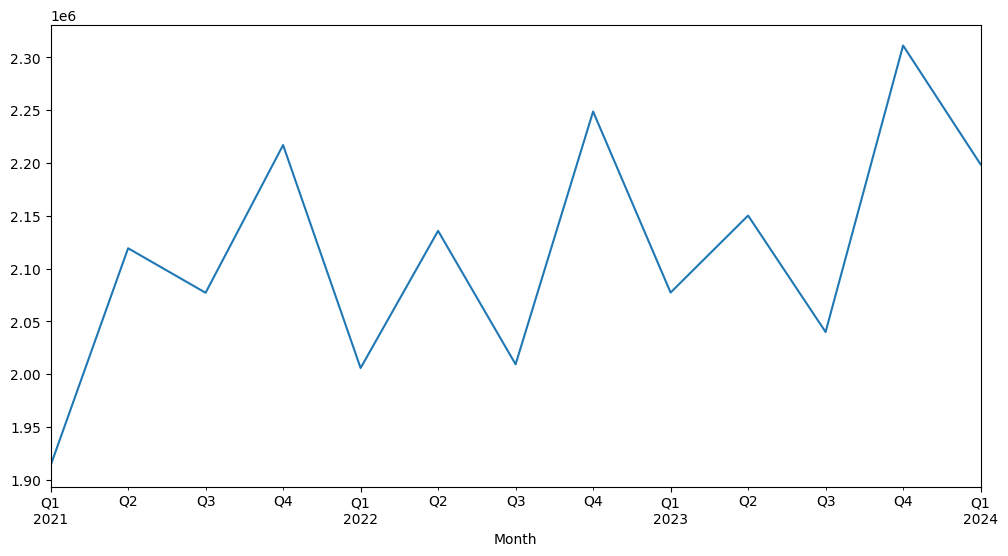

In [ ]:
data = df.iloc[1:]
stansia_data = data[data['NameOfStation'] == 'Митино']

quarter_to_month = {
    'I квартал': '01-01',
    'II квартал': '04-01',
    'III квартал': '07-01',
    'IV квартал': '10-01'
}
stansia_data['Month'] = stansia_data['Year'].astype(str) + '-' + stansia_data['Quarter'].map(quarter_to_month)

stansia_data['Month'] = pd.to_datetime(stansia_data['Month'])

stansia_data['IncomingPassengers'] = pd.to_numeric(stansia_data['IncomingPassengers'], errors='coerce')

stansia_data = stansia_data.sort_values('Month')

stansia_data = stansia_data[['Month', 'IncomingPassengers']]
stansia_data.set_index('Month', inplace=True)

stansia_data['IncomingPassengers'].plot(figsize=(12,6))
print(stansia_data)
plt.show()


In [ ]:
# # Преобразуем квартал и год в месяцы для всех записей
# data['Month'] = data['Quarter'].map(month_mapping)

# # Группируем данные по станциям
# grouped_data = data.groupby('NameOfStation')[['Month', 'IncomingPassengers']].apply(lambda x: x.reset_index(drop=True))

# # Выводим обработанные данные
# grouped_data.head(200)  # Выведем первые 20 записей для проверки результатов

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
WINDOW_SIZE = 3
X1, y1 = df_to_X_y(stansia_data["IncomingPassengers"], WINDOW_SIZE)
X1.shape, y1.shape

((10, 3, 1), (10,))

In [ ]:
X_train1, y_train1 = X1[:6], y1[:6]
X_test1, y_test1 = X1[6:], y1[6:]
X_train1.shape, y_train1.shape,X_test1.shape, y_test1.shape

((6, 3, 1), (6,), (4, 3, 1), (4,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((3, 1)))
model1.add(LSTM(64))
model1.add(Dense(7, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
 dense_7 (Dense)             (None, 1)                 4         
                                                                 
Total params: 17095 (66.78 KB)
Trainable params: 17095 (66.78 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=1000000), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=20, callbacks=[cp1])

# validation_data=(X_test1, y_test1) - для контроля переобучения

Epoch 1/20
1/1 [==============================] - 0s 309ms/step - loss: 166845497344.0000 - root_mean_squared_error: 408467.2500 - val_loss: 62825193472.0000 - val_root_mean_squared_error: 250649.5469
Epoch 2/20
1/1 [==============================] - 4s 4s/step - loss: 38306938880.0000 - root_mean_squared_error: 195721.5781 - val_loss: 9680875520.0000 - val_root_mean_squared_error: 98391.4375
Epoch 3/20
1/1 [==============================] - 0s 59ms/step - loss: 14193496064.0000 - root_mean_squared_error: 119136.4609 - val_loss: 56110620672.0000 - val_root_mean_squared_error: 236876.8125
Epoch 4/20
1/1 [==============================] - 0s 41ms/step - loss: 84644847616.0000 - root_mean_squared_error: 290937.8750 - val_loss: 118105554944.0000 - val_root_mean_squared_error: 343664.8750
Epoch 5/20
1/1 [==============================] - 0s 40ms/step - loss: 160134086656.0000 - root_mean_squared_error: 400167.5625 - val_loss: 122798489600.0000 - val_root_mean_squared_error: 350426.1562
Epoc

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

1/1 [==============================] - 0s 444ms/step


,Train Predictions,Actuals
0,2188637.0,2217044
1,2188637.0,2005840
2,2188637.0,2135762
3,2188637.0,2009371
4,2188637.0,2248792
5,2188637.0,2077333


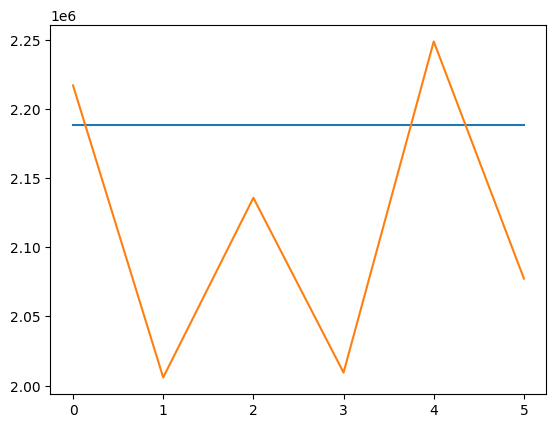

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

In [ ]:
val_predictions = model1.predict(X_test1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_test1})
val_results

1/1 [==============================] - 0s 21ms/step


,Val Predictions,Actuals
0,2188637.0,2150247
1,2188637.0,2039967
2,2188637.0,2311297
3,2188637.0,2198710
